# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [3]:
monthly_avg = df['count'].resample('ME').mean()

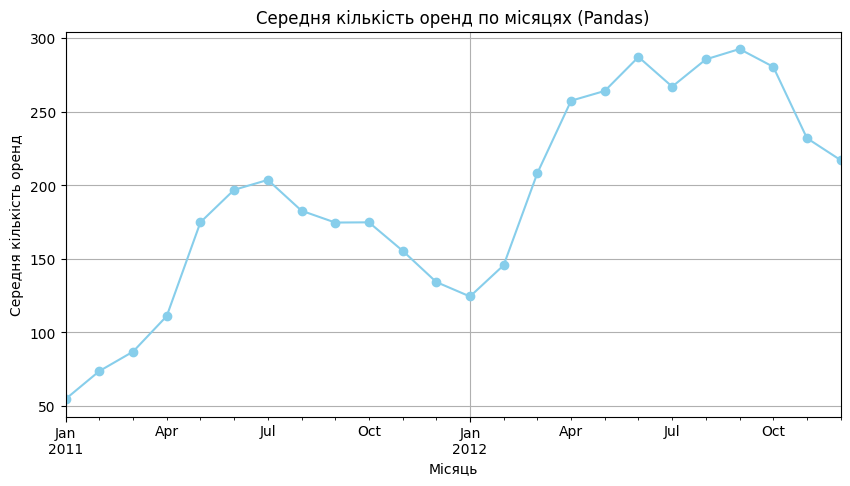

In [7]:
monthly_avg.plot(
    marker='o',
    color='skyblue',
    figsize=(10, 5),
    title='Середня кількість оренд по місяцях (Pandas)',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
    grid=True
)

plt.show()

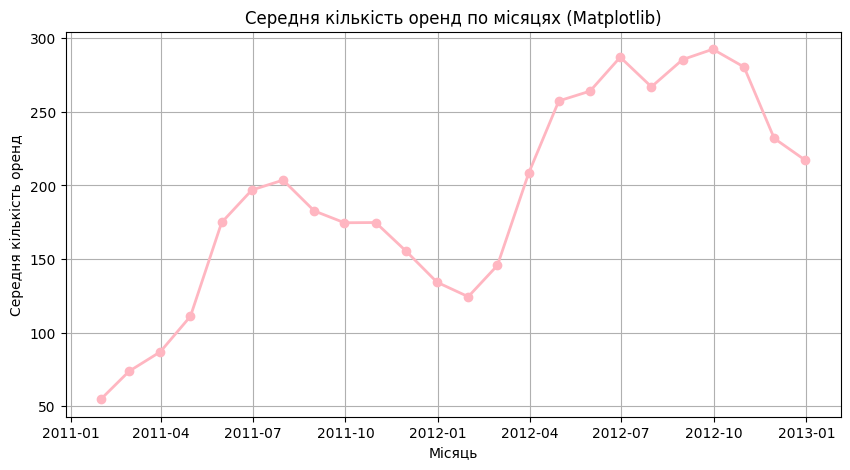

In [11]:
plt.figure(figsize=(10, 5))

plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    color='lightpink',
    linewidth=2
)

plt.title('Середня кількість оренд по місяцях (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)

plt.show()

Обидва графіки відображають однакову інформацію - середню кількість оренд велосипедів по місяцях. Основні відмінності між графіками полягають у способі побудови та оформленні. Графік, створений за допомогою Pandas, будується швидше і потребує менше коду. Він автоматично налаштовує підписи осей, формат дат та загальний вигляд. Графік, побудований через Matplotlib напряму, дає більше контролю над зовнішнім виглядом - можна точніше налаштовувати кольори, товщину лінії, стиль маркерів та інші параметри.
Також, варто відмітити, що на другому графіку (Matplotlib) підписи дат виглядають більш детально (у форматі YYYY-MM), тоді як у Pandas вони більш узагальнені.
Обидва графіки інформативні, але для швидкого аналізу даних зручніше використовувати Pandas, а для створення більш кастомізованих візуалізацій - Matplotlib.
З функціональної точки зору мені більше подобається графік, побудований за допомогою Matplotlib, тому що він надає більше можливостей для налаштування і є більш гнучким для подальшого використання у звітах/презентаціях.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [12]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

In [14]:
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']

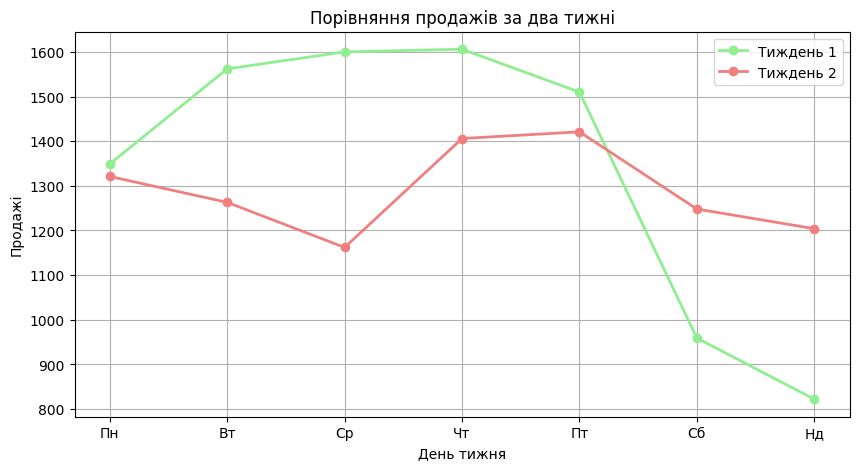

In [25]:
plt.figure(figsize=(10, 5))

plt.plot(
    days,
    sales_week1,
    marker='o',
    color='lightgreen',
    linewidth=2,
    label='Тиждень 1'
)

plt.plot(
    days,
    sales_week2,
    marker='o',
    color='lightcoral',
    linewidth=2,
    label='Тиждень 2'
)

plt.title('Порівняння продажів за два тижні')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.xticks(days, day_names)
plt.legend()
plt.grid(True)

plt.show()

1. Судячи з графіку, більш стабільними були продажі у другий тиждень. Лінія цього тижня має менші коливання і не демонструє різких спадів чи підйомів, на відміну від лінії першого тижня, яка показує значний спад продажів у вихідні, що свідчить про більшу нестабільність.

2. Висновок можна підтвердити обчисленням стандартного відхилення або діапазону значень (подивитись різницю між максимумом і мінімумом). Для першого тижня дані показники більші, що означає більшу варіативність даних, тоді як для другого тижня вони менші, отже продажі були стабільнішими.

In [26]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(std_week1, std_week2)

299.99857142517004 90.9060964256355


In [29]:
range_week1 = max(sales_week1) - min(sales_week1)
range_week2 = max(sales_week2) - min(sales_week2)

print(range_week1, range_week2)

784 259


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [30]:
temp_monthly = df['temp'].resample('ME').mean()

In [31]:
count_quarterly = df['count'].resample('QE').mean()

In [32]:
humidity = df['humidity']

In [43]:
temp = df['temp']

In [44]:
count = df['count']

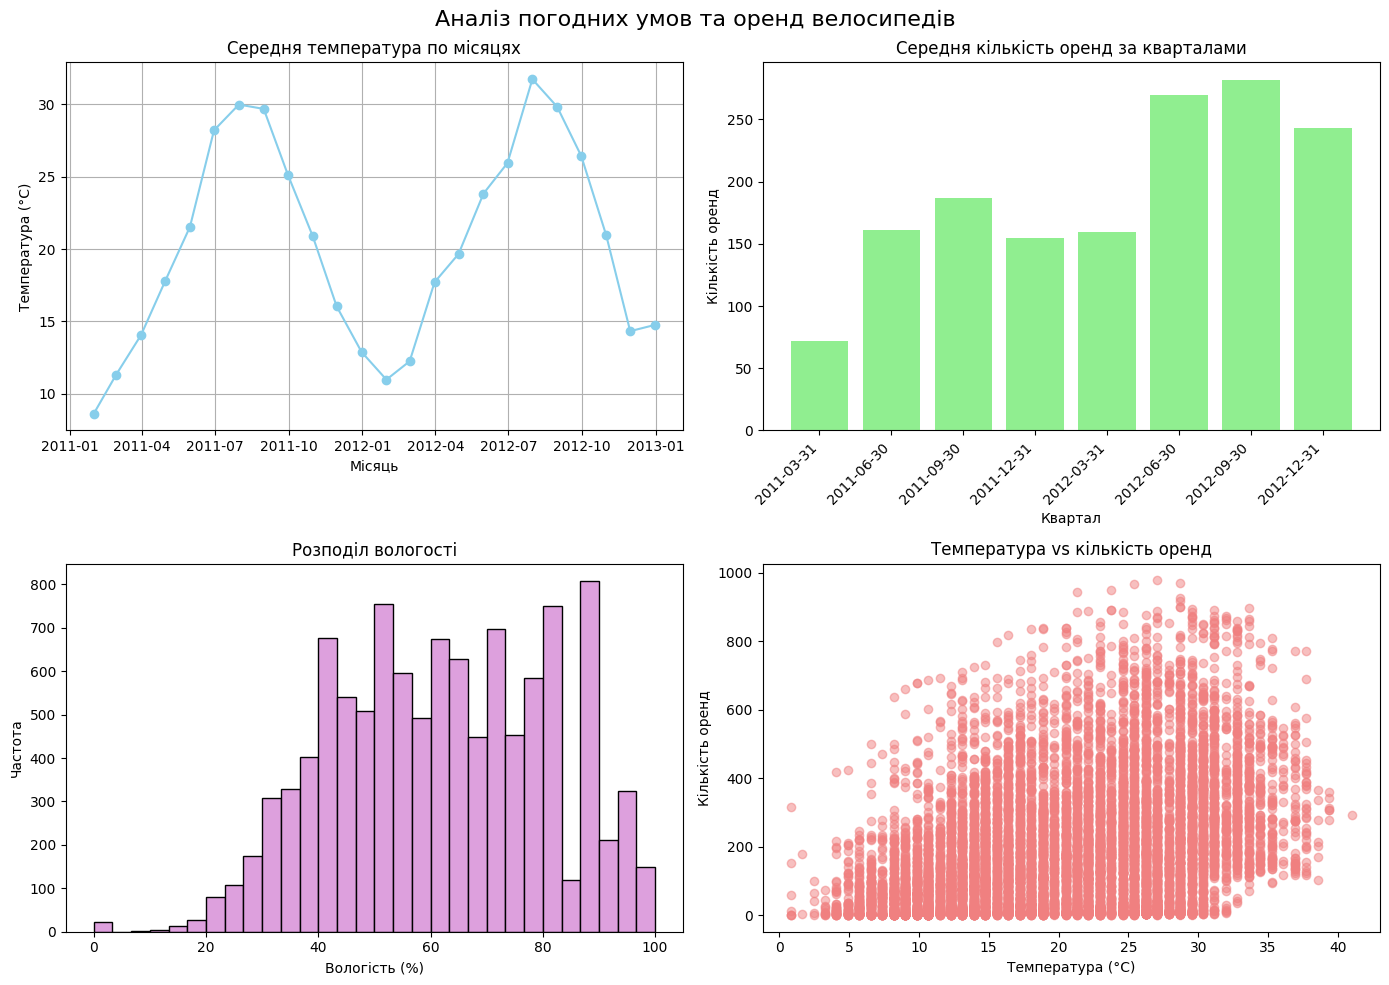

In [62]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(
    temp_monthly.index,
    temp_monthly.values,
    marker='o',
    color='skyblue'
)
plt.title('Середня температура по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Температура (°C)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.bar(
    count_quarterly.index.astype(str),
    count_quarterly.values,
    color='lightgreen'
)
plt.title('Середня кількість оренд за кварталами')
plt.xlabel('Квартал')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
plt.hist(
    humidity,
    bins=30,
    color='plum',
    edgecolor='black'
)
plt.title('Розподіл вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.scatter(
    temp,
    count,
    color='lightcoral',
    alpha=0.5
)
plt.title('Температура vs кількість оренд')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')

plt.suptitle('Аналіз погодних умов та оренд велосипедів', fontsize=16)

plt.tight_layout()
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

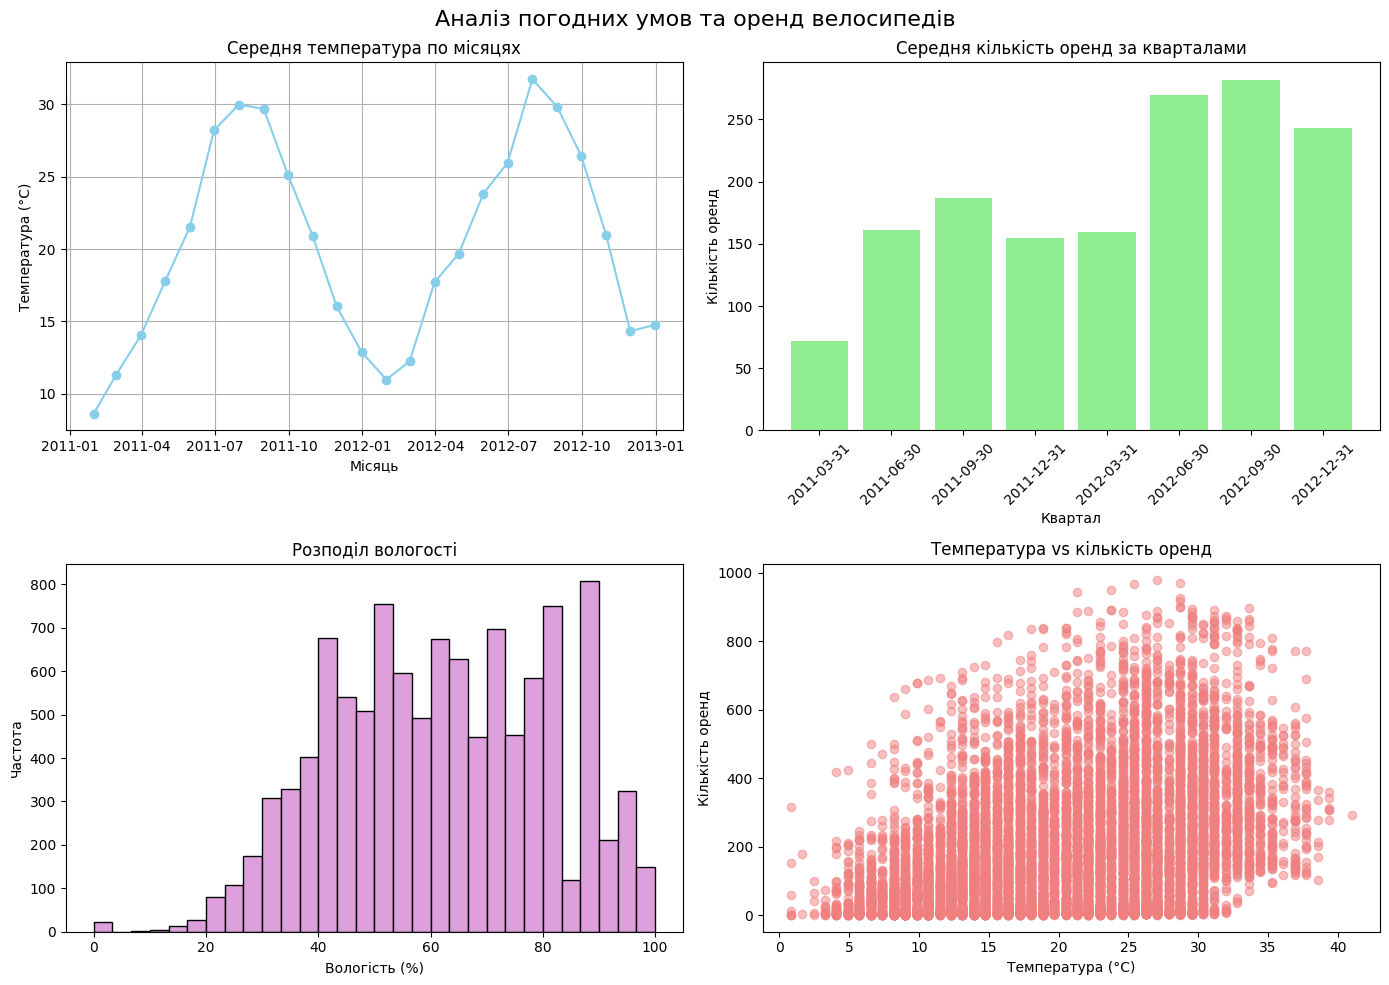

In [73]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ax[0, 0].plot(
    temp_monthly.index,
    temp_monthly.values,
    marker='o',
    color='skyblue'
)
ax[0, 0].set_title('Середня температура по місяцях')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура (°C)')
ax[0, 0].grid(True)

ax[0, 1].bar(
    count_quarterly.index.astype(str),
    count_quarterly.values,
    color='lightgreen'
)
ax[0, 1].set_title('Середня кількість оренд за кварталами')
ax[0, 1].set_xlabel('Квартал')
ax[0, 1].set_ylabel('Кількість оренд')
ax[0, 1].tick_params(axis='x', rotation=45)

ax[1, 0].hist(
    humidity,
    bins=30,
    color='plum',
    edgecolor='black'
)
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість (%)')
ax[1, 0].set_ylabel('Частота')

ax[1, 1].scatter(
    temp,
    count,
    color='lightcoral',
    alpha=0.5
)
ax[1, 1].set_title('Температура vs кількість оренд')
ax[1, 1].set_xlabel('Температура (°C)')
ax[1, 1].set_ylabel('Кількість оренд')

fig.suptitle('Аналіз погодних умов та оренд велосипедів', fontsize=16)

plt.tight_layout()
plt.show()

plt.subplot() створює підграфіки по одному (тобто послідовно) і працює з поточним графіком. plt.subplots() одразу створює фігуру та набір осей (тобто всі підграфіки одразу), що дозволяє керувати кожним графіком окремо. Другий підхід є більш гнучким і зручним для створення складних візуалізацій.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [74]:
import matplotlib.dates as mdates

In [75]:
monthly_mean = df["count"].resample("ME").mean()
monthly_max  = df["count"].resample("ME").max()
monthly_min  = df["count"].resample("ME").min()

In [100]:
overall_mean = monthly_mean.mean()
overall_std  = monthly_mean.std()

In [85]:
raw_min = int(df["count"].min())
raw_max = int(df["count"].max())

In [86]:
idx_max = monthly_mean.idxmax()
idx_min = monthly_mean.idxmin()
val_max = monthly_mean.loc[idx_max]
val_min = monthly_mean.loc[idx_min]

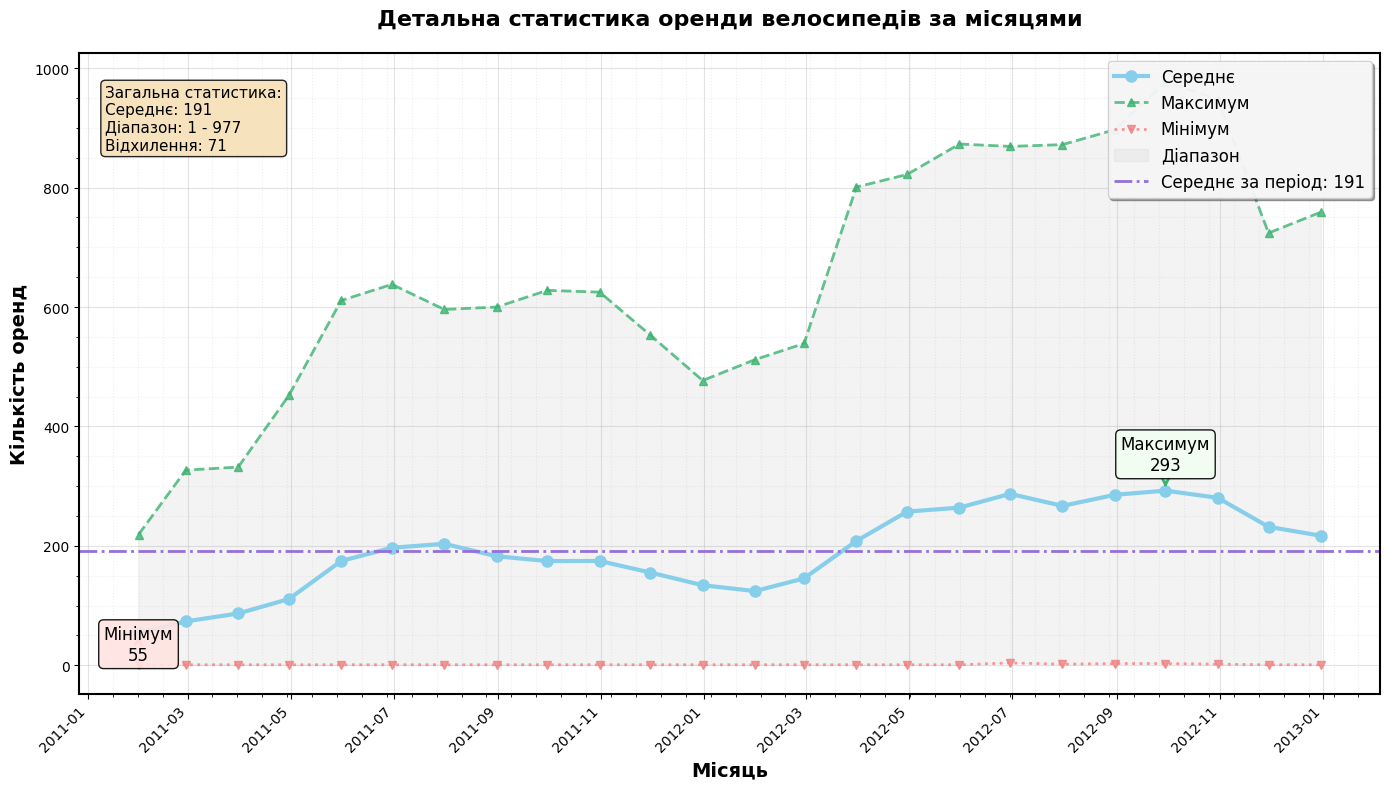

In [103]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    monthly_mean.index, monthly_mean.values,
    color='skyblue', marker='o', linewidth=3,
    label='Середнє', markersize=8
)

ax.plot(
    monthly_max.index, monthly_max.values,
    color='mediumseagreen', linestyle='--', marker='^',
    linewidth=2, label='Максимум',
    markersize=6, alpha=0.8
)

ax.plot(
    monthly_min.index, monthly_min.values,
    color='lightcoral', linestyle=':', marker='v',
    linewidth=2, label='Мінімум',
    markersize=6, alpha=0.8
)

ax.fill_between(
    monthly_mean.index,
    monthly_min.values,
    monthly_max.values,
    alpha=0.25,
    color='lightgray',
    label='Діапазон'
)

ax.annotate(
    f'Максимум\n{val_max:.0f}',
    xy=(idx_max, val_max),
    xytext=(idx_max, val_max + 35),
    arrowprops=dict(arrowstyle='->', color='mediumseagreen', lw=2),
    fontsize=12,
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", facecolor='honeydew', alpha=0.9)
)

ax.annotate(
    f'Мінімум\n{val_min:.0f}',
    xy=(idx_min, val_min),
    xytext=(idx_min, val_min - 45),
    arrowprops=dict(arrowstyle='->', color='lightcoral', lw=2),
    fontsize=12,
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", facecolor='mistyrose', alpha=0.9)
)

ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')

ax.set_title('Детальна статистика оренди велосипедів за місяцями',
             fontsize=16, fontweight='bold', pad=20)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)
    lbl.set_ha('right')

ax.grid(True, which='major', linestyle='-', alpha=0.35)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

ax.axhline(
    y=overall_mean,
    color='mediumpurple',
    linestyle='-.',
    linewidth=2,
    label=f'Середнє за період: {overall_mean:.0f}'
)

ax.legend(
    loc='upper right',
    fontsize=12,
    frameon=True,
    shadow=True,
    fancybox=True,
    framealpha=0.9
)

textstr = (
    "Загальна статистика:\n"
    f"Середнє: {overall_mean:.0f}\n"
    f"Діапазон: {raw_min} - {raw_max}\n"
    f"Відхилення: {overall_std:.0f}"
)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.85)

ax.text(
    0.02, 0.95,
    textstr,
    transform=ax.transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=props
)

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

1. Анотації дозволяють виділити важливі точки графіку, наприклад максимум, мінімум або різкі зміни показників. Вони допомагають швидко звернути увагу користувача на ключові значення без необхідності детально аналізувати весь графік.

2. Функція fill_between() використовується для зафарбовування області між двома кривими. У цьому завданні вона показує діапазон значень між мінімальною та максимальною кількістю оренд. Така візуалізація допомагає оцінити варіативність даних і наочно демонструє, наскільки сильно змінюються показники в межах кожного періоду.

3. Текстовий блок містить узагальнену статистичну інформацію, наприклад середнє значення, діапазон і стандартне відхилення. Він дозволяє швидко зрозуміти загальні характеристики даних без необхідності самостійно оцінювати їх по графіку. Це робить візуалізацію більш інформативною та зручною для прийняття рішень.